In [1]:
import pandas as pd
import seaborn as sn

                                    LOADING DATASET

In [2]:
df =pd.read_excel("loan_data_set.xlsx")

                        CONVERTING OUR EXCEL DATA INTO CSV

In [3]:
df.to_csv("loan_data_set.csv", index=False)


print("converted successfully!")

converted successfully!


                                LOADING OUR CSV DATASET

In [4]:
df = pd.read_csv("loan_data_set.csv")

                            STATISTICAL ANALYSIS

In [5]:
df.shape

(614, 13)

In [6]:
df.info()  # To check data types and non-null counts
df.describe()  # Statistical summary for numerical columns
df.describe(include=['O'])  # Statistical summary for categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

                            EXPLORATORY DATAANALYSIS

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DETERMINING CATEGORICAL COLUMNS

In [10]:
gender = df['Gender'].value_counts()
print(gender)

Gender
Male      489
Female    112
Name: count, dtype: int64


In [11]:
marital_status = df['Married'].value_counts()
print(marital_status)

Married
Yes    398
No     213
Name: count, dtype: int64


In [12]:
education = df['Education'].value_counts()
print(education)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [13]:
employement = df['Self_Employed'].value_counts()
print(employement)

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [14]:
property_area = df['Property_Area'].value_counts()
print(property_area)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [15]:
loan_status = df['Loan_Status'].value_counts()
print(loan_status)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


DATA CLEANING

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

DROPPING LOAN ID

In [17]:
df.drop(columns=["Loan_ID"], inplace=True)

print("Dropped Successfully!")

Dropped Successfully!


In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


VISUALISIG DISTRIBUTION BEFORE FILLING MISSING VALUES

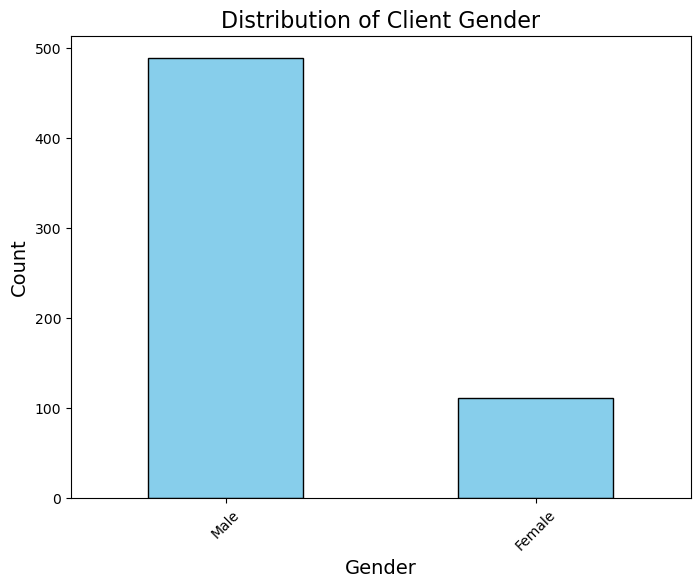

In [19]:
import matplotlib.pyplot as plt

client_marital_status = df['Gender'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 6))
client_marital_status.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Client Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


FILLING MISSING VALUES WITH FEMALE

In [20]:
# Fill missing values with female
df['Gender'].fillna('Female', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client gender is: {df['Gender'].isnull().sum()}")

Missing values in client gender is: 0


VISUALISING DISTRIBUTION AFTER FILLING MISSING VALUES

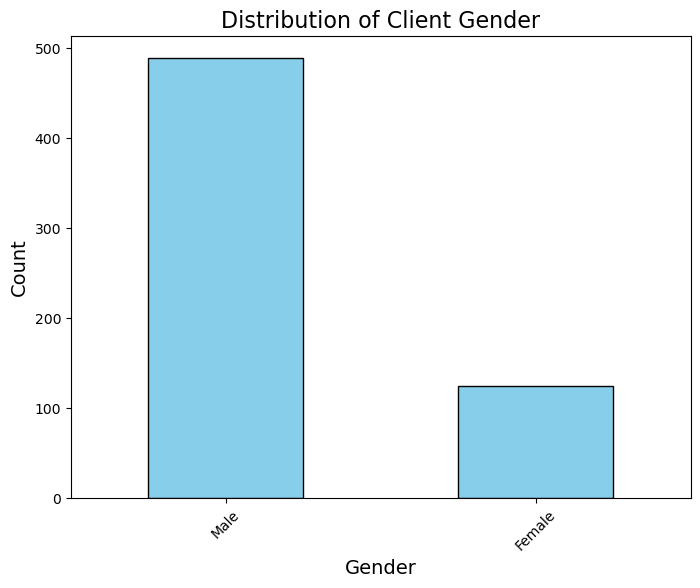

In [21]:
client_marital_status = df['Gender'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 6))
client_marital_status.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Client Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [22]:
gender = df['Gender'].value_counts()
print(gender)

Gender
Male      489
Female    125
Name: count, dtype: int64


CONVERTING THE COLUMN TO CATEGORY

In [23]:
# Convert Gender column to categorical type
df['Gender'] = df['Gender'].astype('category')

# Confirm the conversion
print(f"Data type of Gender after conversion: {df['Gender'].dtype}")

# Check the categories
print(f"\nCategories in Gender: {df['Gender'].cat.categories}")

Data type of Gender after conversion: category

Categories in Gender: Index(['Female', 'Male'], dtype='object')


REPEATING THE SAME STEPS WE DID WITH GENDER COLUMN

In [24]:

# Fill missing values with Yes
df['Self_Employed'].fillna('Yes', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client self employment is: {df['Self_Employed'].isnull().sum()}")

Missing values in client self employment is: 0


In [25]:
# Convert Self_Employed column to categorical type
df['Self_Employed'] = df['Self_Employed'].astype('category')

# Confirm the conversion
print(f"Data type of Self_Employed after conversion: {df['Self_Employed'].dtype}")

# Check the categories
print(f"\nCategories in Self_Employed: {df['Self_Employed'].cat.categories}")

Data type of Self_Employed after conversion: category

Categories in Self_Employed: Index(['No', 'Yes'], dtype='object')


In [26]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# Fill missing values with no
df['Married'].fillna('No', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client maried is: {df['Married'].isnull().sum()}")

Missing values in client maried is: 0


In [28]:
# Convert Married column to categorical type
df['Married'] = df['Married'].astype('category')

# Confirm the conversion
print(f"Data type of Married after conversion: {df['Married'].dtype}")

# Check the categories
print(f"\nCategories in Married: {df['Married'].cat.categories}")

Data type of Married after conversion: category

Categories in Married: Index(['No', 'Yes'], dtype='object')


In [29]:
# Convert Property_Area column to categorical type
df['Property_Area'] = df['Property_Area'].astype('category')

# Confirm the conversion
print(f"Data type of Property_Area after conversion: {df['Property_Area'].dtype}")

# Check the categories
print(f"\nCategories in Property_Area: {df['Property_Area'].cat.categories}")

Data type of Property_Area after conversion: category

Categories in Property_Area: Index(['Rural', 'Semiurban', 'Urban'], dtype='object')


In [30]:
# Convert Loand_Status column to categorical type
df['Loan_Status'] = df['Loan_Status'].astype('category')

# Confirm the conversion
print(f"Data type of Loan_Status after conversion: {df['Loan_Status'].dtype}")

# Check the categories
print(f"\nCategories in Loan_Status: {df['Loan_Status'].cat.categories}")

Data type of Loan_Status after conversion: category

Categories in Loan_Status: Index(['N', 'Y'], dtype='object')


In [31]:
# Convert Education column to categorical type
df['Education'] = df['Education'].astype('category')

# Confirm the conversion
print(f"Data type of Education after conversion: {df['Education'].dtype}")

# Check the categories
print(f"\nCategories in Education: {df['Education'].cat.categories}")

Data type of Education after conversion: category

Categories in Education: Index(['Graduate', 'Not Graduate'], dtype='object')


In [32]:
# Convert Dependents column to categorical type
df['Dependents'] = df['Dependents'].astype('category')

# Confirm the conversion
print(f"Data type of Dependents after conversion: {df['Dependents'].dtype}")

# Check the categories
print(f"\nCategories in Dependents: {df['Dependents'].cat.categories}")

Data type of Dependents after conversion: category

Categories in Dependents: Index(['0', '1', '2', '3+'], dtype='object')


In [33]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [34]:
# Fill missing values with 3+
df['Dependents'].fillna('3+', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client Dependents is: {df['Dependents'].isnull().sum()}")

Missing values in client Dependents is: 0


In [35]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
# Fill LoanAmount using median
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)

In [38]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
bins = [0, 100, 200, 1000]
labels = ["small", "medium", "large"]
df["LoanAmount_Group"] = pd.cut(df["LoanAmount"], bins=bins, labels=labels)

def fill_loan_term(row):
    if pd.isna(row["Loan_Amount_Term"]):
        group = row["LoanAmount_Group"]
        mode = df[df["LoanAmount_Group"] == group]["Loan_Amount_Term"].mode()
        return mode[0] if not mode.empty else df["Loan_Amount_Term"].mode()[0]
    return row["Loan_Amount_Term"]

df["Loan_Amount_Term"] = df.apply(fill_loan_term, axis=1)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Group
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,small
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,medium
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [41]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Group      0
dtype: int64

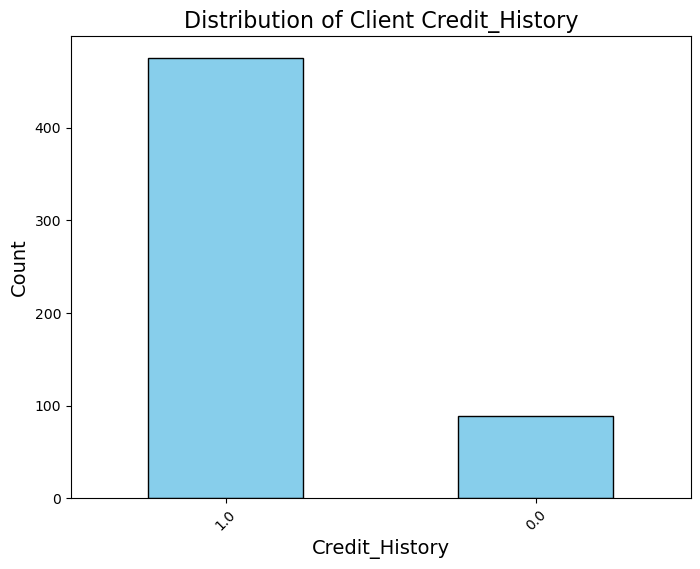

In [42]:
credit_history = df['Credit_History'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 6))
credit_history.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Client Credit_History', fontsize=16)
plt.xlabel('Credit_History', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [43]:
# Fill missing values with 0.0
df['Credit_History'].fillna(0.0, inplace=True)

# Verify if there are still missing values
print(f"Missing values in client Credit_History is: {df['Credit_History'].isnull().sum()}")

Missing values in client Credit_History is: 0


In [44]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
LoanAmount_Group     category
dtype: object

In [45]:
# Convert Education column to categorical type
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

In [46]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term        int32
Credit_History        float64
Property_Area        category
Loan_Status          category
LoanAmount_Group     category
dtype: object

                STATISTICAL ANALYSIS FOR LOAN AMOUNT COLUMN

In [47]:
# Basic statistical description


loan_amount = df['LoanAmount']


# Basic stats
print(loan_amount.describe())

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


In [48]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


loan_mode = df['LoanAmount'].mode()

print(f"Loan amount mode is: {loan_mode}")

Loan amount mode is: 0    128.0
Name: LoanAmount, dtype: float64


VARIANCE

In [49]:
print(f"Variance: {loan_amount.var()}")

Variance: 7074.026706909471


SKEWNESS

In [50]:
print(f"Skewness: {loan_amount.skew()}")

Skewness: 2.743052748820892


PERCENTILES

In [51]:
print(f"10th Percentile: {loan_amount.quantile(0.10)}")
print(f"90th Percentile: {loan_amount.quantile(0.90)}")

10th Percentile: 72.30000000000001
90th Percentile: 229.4000000000001


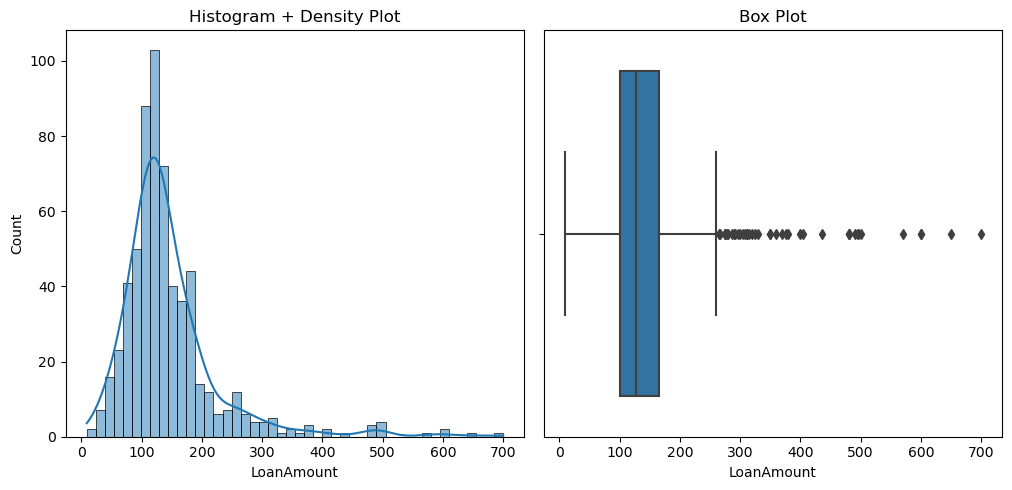

In [52]:
# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(loan_amount, kde=True)
plt.title('Histogram + Density Plot')


#Outlier detection
plt.subplot(1, 3, 2)
sns.boxplot(x=loan_amount)
plt.title('Box Plot')

plt.tight_layout()
plt.show()

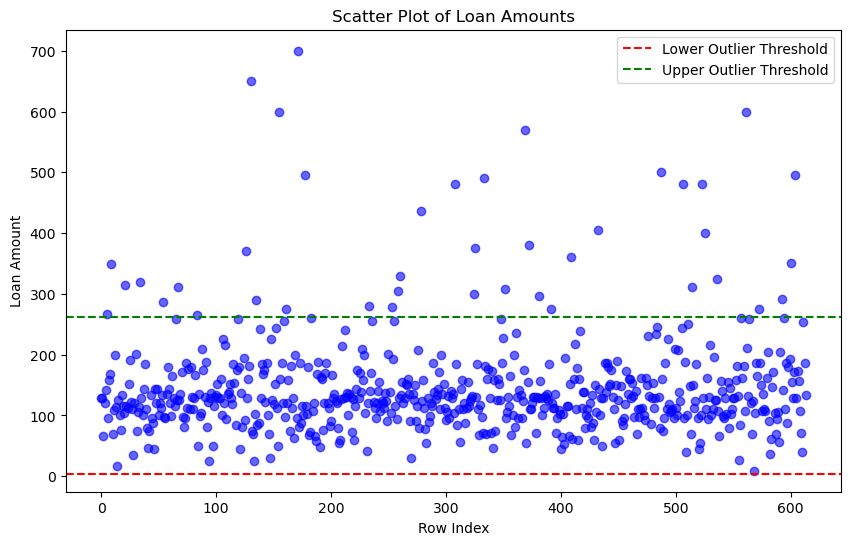

In [53]:
plt.figure(figsize=(10, 6))

# X-axis: Row index; Y-axis: LoanAmount
plt.scatter(x=df.index, y=df['LoanAmount'], color='blue', alpha=0.6)

plt.title('Scatter Plot of Loan Amounts')
plt.xlabel('Row Index')
plt.ylabel('Loan Amount')

# Optional: Draw horizontal lines at important percentiles
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Outlier Threshold')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Outlier Threshold')

plt.legend()
plt.show()

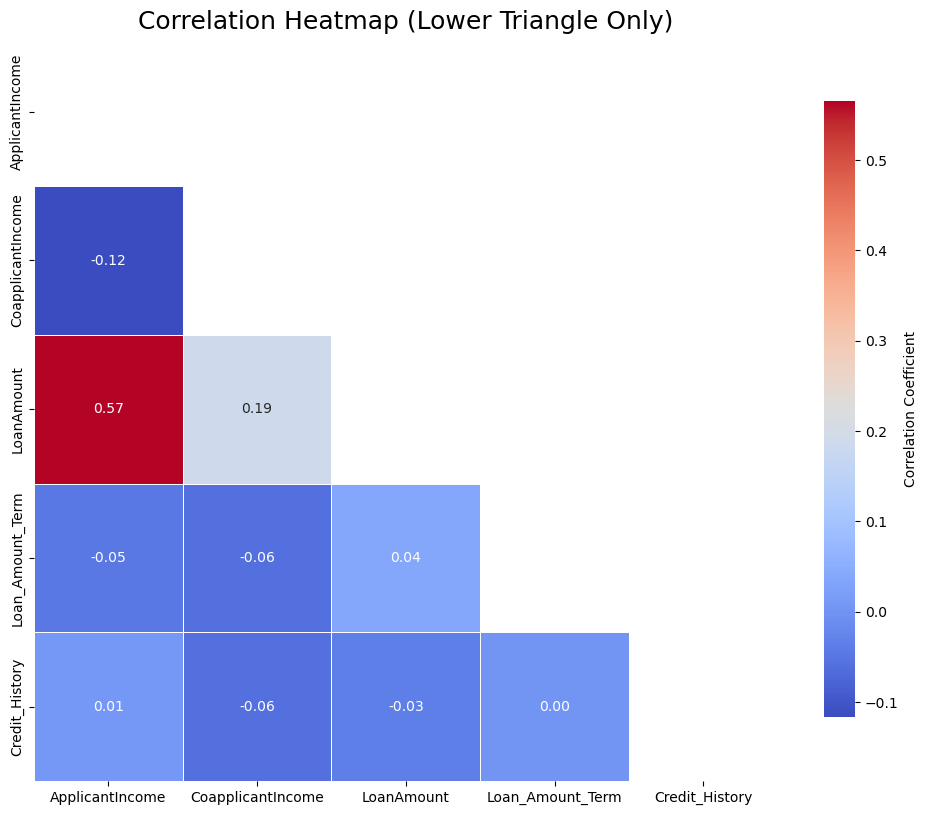

In [54]:
import numpy as np

numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap (Lower Triangle Only)', fontsize=18)

plt.show()


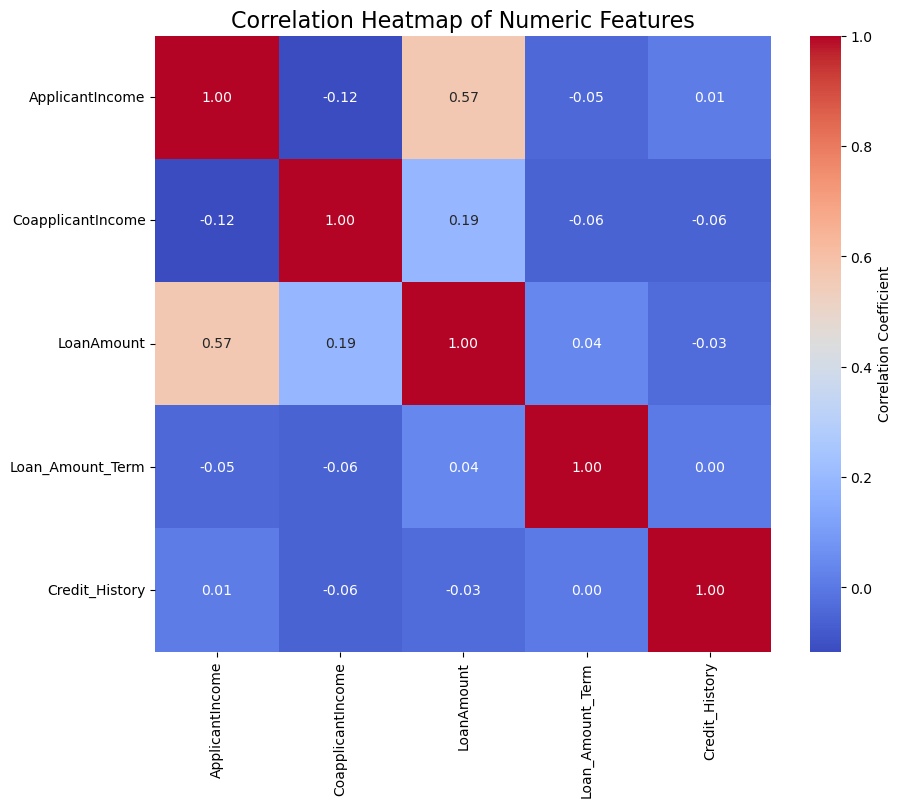

In [55]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Add title
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)

# Show the plot
plt.show()

In [56]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Group
0,Male,No,0,Graduate,No,5849,0.0,128.0,360,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y,small
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y,medium
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y,medium


In [57]:
df.to_csv('cleaned_loan_data.csv')

print('Converted successfully!')

Converted successfully!


In [58]:
pip install pandas xgboost scikit-learn

In [59]:
pip install pandas scikit-learn xgboost scipy

Note: you may need to restart the kernel to use updated packages.


Calculated scale_pos_weight: 0.45
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters Found:
{'colsample_bytree': 0.8736600550686904, 'gamma': 2.698460661945399, 'learning_rate': 0.18602534969915446, 'max_depth': 3, 'n_estimators': 173, 'scale_pos_weight': 0.45, 'subsample': 0.6379995910112717}

Optimal Threshold Based on F1: 0.2207999974489212

Evaluation Metrics After Threshold Tuning:
Accuracy: 0.7724
Precision: 0.7664
Recall: 0.9647
F1 Score: 0.8542
ROC AUC: 0.7505
Confusion Matrix:
 [[13 25]
 [ 3 82]]


<Figure size 1000x600 with 0 Axes>

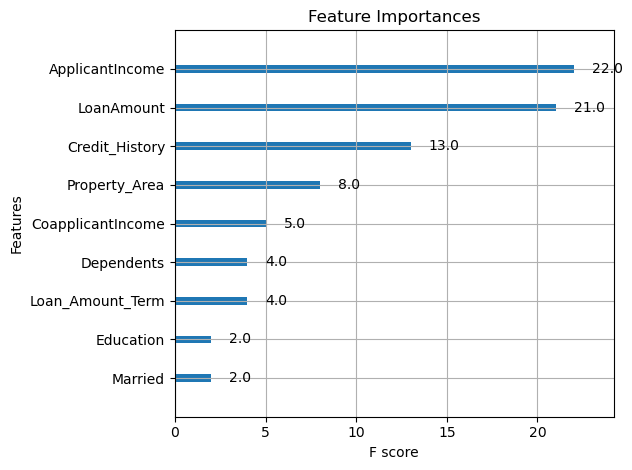

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, precision_recall_curve
)
from scipy.stats import uniform, randint
import warnings

warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("cleaned_loan_data.csv")

# Clean string columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.strip().str.title()

# Encode categorical variables
label_maps = {
    'Gender': {'Male': 0, 'Female': 1},
    'Married': {'No': 0, 'Yes': 1},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
    'Loan_Status': {'N': 0, 'Y': 1}
}
for col, mapping in label_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Drop rows with missing values
features = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Gender', 'Married', 'Education',
    'Self_Employed', 'Dependents', 'Property_Area'
]
target = 'Loan_Status'
df.dropna(subset=[target] + features, inplace=True)

# Define features and target
X = df[features]
y = df[target]

# Standardize numerical features
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Check class imbalance
pos = y.sum()
neg = len(y) - pos
scale_pos_weight = round(neg / pos, 2)
print(f"Calculated scale_pos_weight: {scale_pos_weight}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define hyperparameter space
param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.3),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "gamma": uniform(0, 5),
    "scale_pos_weight": [scale_pos_weight]  # dynamically set
}

# Initialize XGBClassifier
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=30,
    scoring='roc_auc', cv=5, verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

print("\nBest Parameters Found:")
print(random_search.best_params_)

# Predict probabilities and tune threshold
y_prob = best_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal Threshold Based on F1: {round(optimal_threshold, 4)}")

# Predict with optimal threshold
y_pred = (y_prob >= optimal_threshold).astype(int)

# Evaluation
print("\nEvaluation Metrics After Threshold Tuning:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances
plt.figure(figsize=(10, 6))
plot_importance(best_model)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [62]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Group
0,0,0,0,0,1,0,5849,0.0,128.0,360,1.0,2,1,Medium
1,1,0,1,1,1,0,4583,1508.0,128.0,360,1.0,0,0,Medium
2,2,0,1,0,1,1,3000,0.0,66.0,360,1.0,2,1,Small
3,3,0,1,0,0,0,2583,2358.0,120.0,360,1.0,2,1,Medium
4,4,0,0,0,1,0,6000,0.0,141.0,360,1.0,2,1,Medium


In [64]:
# Feature engineering
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['IncomeToLoanTerm'] = df['TotalIncome'] / df['Loan_Amount_Term']

df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Group,TotalIncome,IncomeToLoanTerm
0,0,0,0,0,1,0,5849,0.0,128.0,360,1.0,2,1,Medium,5849.0,16.247222
1,1,0,1,1,1,0,4583,1508.0,128.0,360,1.0,0,0,Medium,6091.0,16.919444
2,2,0,1,0,1,1,3000,0.0,66.0,360,1.0,2,1,Small,3000.0,8.333333
3,3,0,1,0,0,0,2583,2358.0,120.0,360,1.0,2,1,Medium,4941.0,13.725000
4,4,0,0,0,1,0,6000,0.0,141.0,360,1.0,2,1,Medium,6000.0,16.666667


In [69]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import uniform, randint
import pandas as pd

# --- Features & Target ---
features = [
    'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
    'Credit_History', 'Dependents', 'Self_Employed',
    'Education', 'Property_Area', 'TotalIncome', 'IncomeToLoanTerm'
]
target = 'LoanAmount'

X = df[features]
y = df[target]

# --- Scaling Numeric Features ---
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'TotalIncome', 'IncomeToLoanTerm']
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- XGBRegressor with Tuning ---
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# --- Evaluate Best Model ---
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'colsample_bytree': 0.836965827544817, 'learning_rate': 0.02393512381599932, 'max_depth': 4, 'n_estimators': 184, 'subsample': 0.6682096494749166}
MAE: 34.928041659719575
R² Score: 0.39438676307937726


In [71]:
import joblib

# Save Loan Amount Optimization Model
joblib.dump(best_model, 'loan_amount_optimization_model.pkl')
joblib.dump(scaler, 'loan_amount_scaler.pkl')

['loan_amount_scaler.pkl']